<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Candel, A., Parmar, V., LeDell, E., and Arora, A. (Jun 2020). Deep Learning
with H2O. http://h2o.ai/resources.

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf?_ga=2.184768361.1553179602.1592730801-433090902.1592730801



In [1]:
!nvidia-smi

Wed Jul  1 04:58:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 128.4MB 96kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=a0d45c145dd5f8434570db39b3483175563cb6006f36b285fcd14b4e51c25e1c
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import urllib
import h2o
from h2o.automl import H2OAutoML
import sys
import os

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
print('matplotlib: {}'.format(matplotlib.__version__))
#print('sklearn: {}'.format(sklearn.__version__))
#print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('sys: {}'.format(sys.version))

matplotlib: 3.2.2
seaborn: 0.10.1
pandas: 1.0.5
numpy: 1.18.5
sys: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpike3j9hb
  JVM stdout: /tmp/tmpike3j9hb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpike3j9hb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,9 hours and 14 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_vk1d1l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [7]:
# Get help
#help(h2o.estimators.glm.H2OGeneralizedLinearEstimator)
#help(h2o.estimators.gbm.H2OGradientBoostingEstimator)
#help(h2o.estimators.deeplearning.H2ODeepLearningEstimator)

# Show a demo
#h2o.demo("glm")
#h2o.demo("gbm")
#h2o.demo("deeplearning")

### 여러 파일 준비

In [8]:
BASE_DIR = '/content'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'tmp.csv')

#hkim_data=urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

# 드라이브 전체공유 후..

# column_2C_weka.csv
#hkim_data=urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1oMEvI6gWC4ZAqssQ3s3j6RkWUPa_TSwY', OUTPUT_FILE)

#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
OUTPUT_FILE = os.path.join(BASE_DIR, 'QMS_NVOC_SORT.csv')
df = pd.read_csv(OUTPUT_FILE, delimiter = ',')
print(df.shape)
df.dtypes


(2474447, 9)


Unnamed: 0                 int64
a1.ucube_jnr_no           object
a2.firstlogtime           object
a2.buffer_overflow       float64
a2.pts_advanced_error    float64
a2.stb_rtp_errcnt        float64
a2.no_stream_error       float64
a2.not_decoding_error    float64
nvoc                     float64
dtype: object

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hdf = h2o.import_file(OUTPUT_FILE)
hdf.types

Parse progress: |█████████████████████████████████████████████████████████| 100%


{'C1': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'int'}

In [ ]:
type(hdf)

h2o.frame.H2OFrame

In [ ]:
hdf.head()

C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0,0,0,0,0,0
111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0,0,0,0,0,0
111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0,0,0,0,0,0
111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0,0,0,0,0,0
111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0,0,0,0,0,0
111749,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:50:00,0,0,0,0,0,0
111750,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:00:00,0,0,0,0,0,0
111751,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:10:00,0,0,0,0,0,0
111752,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:20:00,0,0,0,0,0,0
111753,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:30:00,0,0,0,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
count,2.196850e+05,219684.000000,219684.000000,219684.000000,219684.000000,219684.000000,219684.000000
mean,1.158674e+06,0.105515,0.105515,22.417609,0.250405,-0.021417,0.001875
std,6.597281e+05,42.259394,42.259394,842.717183,8.993632,0.154829,0.043266
min,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,5.399130e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.248018e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.709595e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.588566e+06,19644.000000,19644.000000,157649.000000,600.000000,15.000000,1.000000


In [ ]:
hdf.describe()

Rows:476425
Cols:9




,C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
type,int,enum,time,int,int,int,int,int,int
mins,0.0,,1590969600000.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
mean,725517.1280936109,,1591314690395.9485,2.125705254143367,2.1257031551727024,19.14513752455795,0.17957323728443564,-0.01982477792890366,0.0013769247560996088
maxs,2603542.0,,1591660200000.0,158862.0,158862.0,157649.0,600.0,15.0,1.0
sigma,780362.9710552385,,199523563.09681374,506.3425246674413,506.34252467003506,913.8686642148296,8.194085854496024,0.1467908844812301,0.03708142015169987
zeros,1,,0,465710,465710,450340,465824,466724,475768
missing,0,0,1,1,1,1,1,1,1
0,111744.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train,data_test,data_valid = hdf.split_frame(ratios=[.7, .15])

In [ ]:
y = "nvoc"
x = hdf.columns
x.remove(y)
x.remove('C1')
x.remove('a1.ucube_jnr_no')
x.remove('a2.firstlogtime')
x

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error']

#Create model

In [ ]:
#aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "GBM", "DeepLearning", "GLM", "DRF" ], verbosity="info", nfolds=0)
aml = H2OAutoML(max_models = 20, seed = 20, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0)

# Train model

In [ ]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)
!nvidia-smi

AutoML progress: |
04:39:46.765: Project: AutoML_20200623_43946765
04:39:46.765: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:39:46.766: Setting stopping tolerance adaptively based on the training frame: 0.0018486278060750331
04:39:46.766: Build control seed: 20
04:39:46.766: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
04:39:47.23: training frame: Frame key: automl_training_py_3_sid_8f64    cols: 9    rows: 263277  chunks: 8    size: 1969912  checksum: 8780859931678533796
04:39:47.23: validation frame: Frame key: py_5_sid_8f64    cols: 9    rows: 62692  chunks: 8    size: 508724  checksum: -6102850911337396936
04:39:47.27: leaderboard frame: Frame key: automl_leaderboard_py_3_sid_8f64    cols: 9    rows: 29341  chunks: 8    size: 269803  checksum: -5757221926187320246
04:39:47.27: blending frame: NULL
04:39:47.27: response column: nvoc
04:

In [ ]:
leaderboard = aml.leaderboard
leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_5_AutoML_20200623_043946,0.00155993,0.0394959,0.00155993,0.00298573,0.0273773
GBM_3_AutoML_20200623_043946,0.0015632,0.0395373,0.0015632,0.00298641,0.0274318
XGBoost_grid__1_AutoML_20200623_043946_model_1,0.00156347,0.0395408,0.00156347,0.00297637,0.0274325
DRF_1_AutoML_20200623_043946,0.00156392,0.0395465,0.00156392,0.00301469,0.0274121
XRT_1_AutoML_20200623_043946,0.00156454,0.0395543,0.00156454,0.00299758,0.0274196
GBM_grid__1_AutoML_20200623_043946_model_2,0.00156489,0.0395587,0.00156489,0.00301441,0.027445
GLM_1_AutoML_20200623_043946,0.00156529,0.0395638,0.00156529,0.00301095,0.0274281
GBM_4_AutoML_20200623_043946,0.00156587,0.0395711,0.00156587,0.00298569,0.0274642
DeepLearning_1_AutoML_20200623_043946,0.00156621,0.0395754,0.00156621,0.00214402,0.0274274
DeepLearning_grid__2_AutoML_20200623_043946_model_1,0.0015671,0.0395866,0.0015671,0.00181127,0.0274371


#Test

In [ ]:
data_pred=aml.leader.predict(data_test)
data_pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
0.00120334
0.00120334
0.00120334
0.00120334
0.00120334
0.00120334
0.00120334
0.00120334
0.00120334
0.00120334


# Performance check


In [ ]:
aml.leader.model_performance(data_test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.0014899950058961118
RMSE: 0.03860045344158682
MAE: 0.002939379132658309
RMSLE: 0.0267741910488554
Mean Residual Deviance: 0.0014899950058961118


#나머지 모델도 테스트

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

['GBM_5_AutoML_20200623_043946',
 'GBM_3_AutoML_20200623_043946',
 'XGBoost_grid__1_AutoML_20200623_043946_model_1',
 'DRF_1_AutoML_20200623_043946',
 'XRT_1_AutoML_20200623_043946',
 'GBM_grid__1_AutoML_20200623_043946_model_2',
 'GLM_1_AutoML_20200623_043946',
 'GBM_4_AutoML_20200623_043946',
 'DeepLearning_1_AutoML_20200623_043946',
 'DeepLearning_grid__2_AutoML_20200623_043946_model_1',
 'DeepLearning_grid__1_AutoML_20200623_043946_model_1',
 'GBM_2_AutoML_20200623_043946',
 'GBM_grid__1_AutoML_20200623_043946_model_1',
 'XGBoost_1_AutoML_20200623_043946',
 'GBM_1_AutoML_20200623_043946',
 'XGBoost_2_AutoML_20200623_043946',
 'XGBoost_3_AutoML_20200623_043946',
 'XGBoost_grid__1_AutoML_20200623_043946_model_4',
 'XGBoost_grid__1_AutoML_20200623_043946_model_2',
 'XGBoost_grid__1_AutoML_20200623_043946_model_3']

In [ ]:
drf = h2o.get_model([i for i in model_ids if "DRF" in i][0])

In [ ]:
#h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
h2o.get_model([i for i in model_ids if "GBM" in i][0])

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20200623_043946


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,8113.0,1.0,15.0,7.2,1.0,42.0,16.766666




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0014416738428236519
RMSE: 0.03796938033236323
MAE: 0.0028924830224236085
RMSLE: 0.026317845815633106
Mean Residual Deviance: 0.0014416738428236519

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.0013158678891656455
RMSE: 0.03627489337221607
MAE: 0.0027736732797139186
RMSLE: 0.02515039717971069
Mean Residual Deviance: 0.0013158678891656455

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-06-23 04:40:59,0.001 sec,0.0,0.038064,0.002898,0.001449,0.036362,0.002771,0.001322
1,,2020-06-23 04:41:01,1.726 sec,5.0,0.038025,0.002900,0.001446,0.036322,0.002776,0.001319
2,,2020-06-23 04:41:03,3.712 sec,10.0,0.038000,0.002900,0.001444,0.036299,0.002779,0.001318
3,,2020-06-23 04:41:05,5.561 sec,15.0,0.037985,0.002904,0.001443,0.036289,0.002785,0.001317
4,,2020-06-23 04:41:06,7.109 sec,20.0,0.037978,0.002898,0.001442,0.036284,0.002780,0.001317
5,,2020-06-23 04:41:08,8.655 sec,25.0,0.037974,0.002887,0.001442,0.036282,0.002769,0.001316
6,,2020-06-23 04:41:09,10.121 sec,30.0,0.037969,0.002892,0.001442,0.036275,0.002774,0.001316



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.stb_rtp_errcnt,6.225829,1.000000,0.583051
1,a2.no_stream_error,4.183798,0.672007,0.391814
2,a2.pts_advanced_error,0.105188,0.016895,0.009851
3,a2.not_decoding_error,0.093462,0.015012,0.008753
4,a2.buffer_overflow,0.069735,0.011201,0.006531


In [ ]:
h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_20200623_043946


Status of Neuron Layers: predicting nvoc, regression, gaussian distribution, Quadratic loss, 291 weights/biases, 8.7 KB, 2,699,126 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,5,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.324764,0.398233,0,0.120768,0.449956,0.333847,0.528994
2,,3,10,Rectifier,0,0,0,0.0163609,0.0584985,0,0.033733,0.323948,1.015,0.195475
3,,4,10,Rectifier,0,0,0,0.142839,0.261456,0,-0.0448289,0.311703,0.956306,0.0440685
4,,5,1,Linear,,0,0,0.152953,0.291925,0,0.0801797,0.234021,0.0408257,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.0013024560672761417
RMSE: 0.03608955620780258
MAE: 0.0018896054109139259
RMSLE: 0.02502465721165558
Mean Residual Deviance: 0.0013024560672761417

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.00132276008762777
RMSE: 0.036369768869595115
MAE: 0.001902240994710254
RMSLE: 0.025207882743211743
Mean Residual Deviance: 0.00132276008762777

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2020-06-23 04:41:11,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-23 04:41:12,1.870 sec,80718 obs/sec,0.378639,1,99687.0,0.036933,0.001364,0.004297,-0.048512,0.036498,0.001332,0.004250,-0.007530
2,,2020-06-23 04:41:18,7.435 sec,139851 obs/sec,3.419311,9,900226.0,0.036107,0.001304,0.001808,-0.002156,0.036373,0.001323,0.001817,-0.000608
3,,2020-06-23 04:41:23,12.715 sec,165008 obs/sec,7.214489,19,1899409.0,0.036085,0.001302,0.001525,-0.000953,0.036374,0.001323,0.001544,-0.000693
4,,2020-06-23 04:41:27,16.749 sec,175245 obs/sec,10.252039,27,2699126.0,0.036090,0.001302,0.001890,-0.001190,0.036370,0.001323,0.001902,-0.000439



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.not_decoding_error,1.000000,1.000000,0.270712
1,a2.no_stream_error,0.742714,0.742714,0.201062
2,a2.buffer_overflow,0.708354,0.708354,0.191760
3,a2.stb_rtp_errcnt,0.670889,0.670889,0.181618
4,a2.pts_advanced_error,0.572003,0.572003,0.154848


In [ ]:
dl = h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
#dl = h2o.get_model([i for i in model_ids if "GBM" in i][0])

In [ ]:
dl.confusion_matrix()

AttributeError: ignored

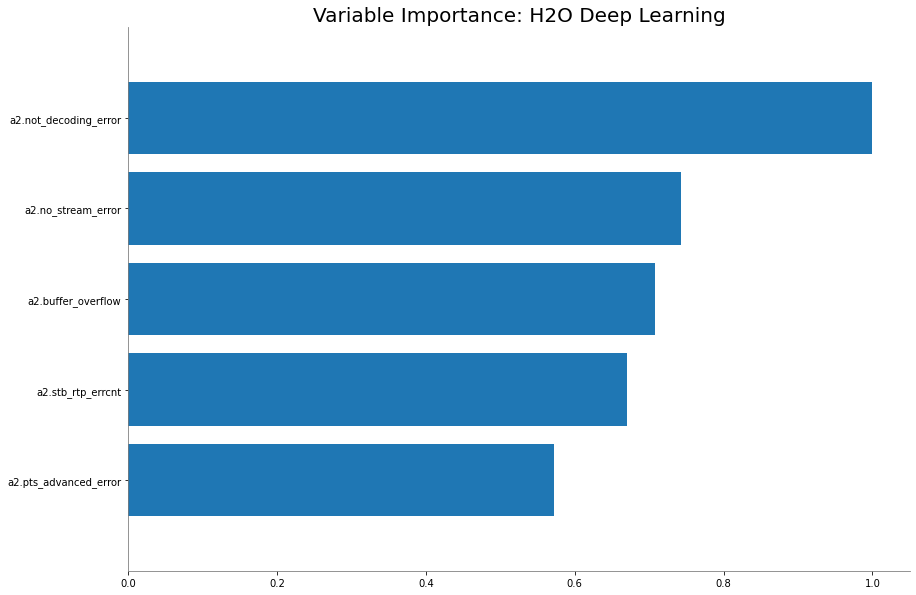

In [ ]:
dl.varimp_plot()

#모델 저장

In [ ]:
aml.leader.download_mojo(path = BASE_DIR)

'/content/GBM_5_AutoML_20200623_043946.zip'